In [42]:
import os
os.chdir('/nfs/pic.es/user/m/mbilkis/cdisc')
import sys
sys.path.insert(0, os.getcwd())

import numpy as np
from numerics.utilities.misc import *
import pickle
import numpy as np
from tqdm import tqdm
import argparse
import matplotlib.pyplot as plt


In [51]:
Ntraj = 1000
omega0, omega1 = 1e4, 1.05e4
omega_pro = (omega0 + omega1)/2
period = (2*np.pi/omega_pro)
dt = period/100
total_time = 100*period
exp_path = "freqs/{}/".format([omega0,omega1])
save_path = get_path_config(exp_path=exp_path,total_time=total_time, dt=dt, noitraj=True)

times = np.arange(0, total_time+ dt, dt )
indis = np.linspace(0,len(times)-1, int(1e4)).astype(int)
timind = [times[k] for k in indis]
indis_range = list(range(len(indis)))

#B = 6.
#dB = .05
B = 100
dB = 25
boundsB= np.arange(-B,B+dB,dB)

bpos = boundsB[boundsB>=0]
bneg = boundsB[boundsB<0]


def load_traj(itraj, what="logliks.npy", flip_params=0):
    gamma0 = gamma1 = 100
    eta0 = eta1 = 1
    kappa0 = kappa1 = 1e3
    n0 = n1 = 1
    omega0, omega1 = 1e4, 1.05e4

    h0 = [gamma0, omega0, n0, eta0, kappa0]
    h1 = [gamma1, omega1, n1, eta1, kappa1]

    omega_pro = (omega0 + omega1)/2
    period = (2*np.pi/omega_pro)
    dt = period/100
    total_time = 100*period
    if flip_params == 1:
        params = [h0, h1]
    else:
        params = [h1,h0]
    exp_path = str(params)+"/"

    l =load_data(exp_path=exp_path, itraj=itraj, total_time=total_time, dt=dt, what=what)
    return l

In [52]:
os.makedirs("figures_freq",exist_ok=True)

In [53]:
path_data = save_path+"B{}_db{}_{}/".format(B,dB,Ntraj)


In [54]:
times_to_errs_det = np.load(path_data+"times_to_err_det.npy")
times_sequential =np.load(path_data+"times_to_err_stoch.npy")

In [55]:
ll0 =np.load(path_data+"ll0.npy")#,np.stack(l0t))
ll1 = np.load(path_data+"ll1.npy")#,np.stack(l1t))

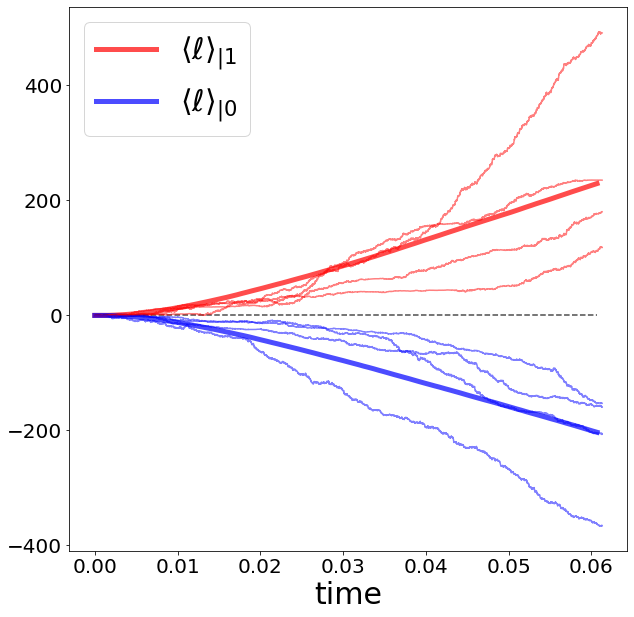

In [56]:
plt.figure(figsize=(10,10))
ax=plt.subplot()
timindt = timind[::100]
ax.plot(timindt,np.mean(ll1,axis=0),color="red", alpha=.7, linewidth=5,label=r'$\langle\ell\rangle_{|1}$')
ax.plot(timindt,np.mean(ll0,axis=0),color="blue", alpha=.7, linewidth=5,label=r'$\langle\ell\rangle_{|0}$')
ax.plot(timindt,0.*np.mean(ll0,axis=0),'--',color="black", alpha=.7)#, linewidth=2#,label="0")

for itraj in range(1,5):
    [l0_1,l1_1], [l1_0,l0_0] = load_traj(itraj=itraj,what="logliks.npy", flip_params=0).T, load_traj(itraj=itraj,what="logliks.npy", flip_params=1).T
    log_lik_ratio, log_lik_ratio_swap = l1_1-l0_1, l1_0-l0_0
    ax.plot(timind,log_lik_ratio,alpha=.5, color="red")
    ax.plot(timind,log_lik_ratio_swap, alpha=.5, color="blue")   
ax.legend(prop={"size":30})
ax.set_xlabel("time",size=30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#plt.savefig("figures_freq/mean_time.pdf")

In [41]:
bpos[80]

4.049999999999965

/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


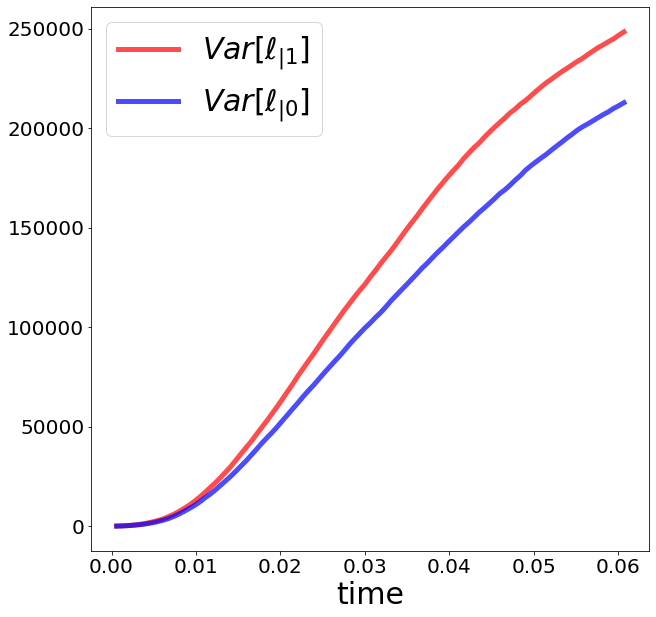

In [8]:
plt.figure(figsize=(10,10))
ax=plt.subplot()
timindt = timind[::100]
ax.plot(timindt,np.std(ll1,axis=0)**2/timindt,color="red", alpha=.7, linewidth=5,label=r'$Var[\ell_{|1}]$')
ax.plot(timindt,np.std(ll0,axis=0)**2/timindt,color="blue", alpha=.7, linewidth=5,label=r'$Var[\ell_{|0}]$')
ax.legend(prop={"size":30})
ax.set_xlabel("time",size=30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.savefig("figures_freq/var_time.pdf")

In [57]:
def give_me_gauss(b, mu,sigma,xrange):
    gauss = lambda x,m,g: np.exp(-((x-m)**2)/(2*g**2))/np.sqrt(2*np.pi*g**2)
    xx = np.linspace(xrange[0], xrange[1],500)
    return xx, np.array([gauss(x, mu, sigma) for x in xx])


indistats = -1
c1, b1 = np.histogram(ll1[:,indistats], bins=50, normed=True)
c0, b0 = np.histogram(ll0[:,indistats], bins=50, normed=True)

timstats = [times[k] for k in np.linspace(0,len(times)-1,ll0.shape[1]).astype(int)]

/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if __name__ == '__main__':


In [58]:
def fit_2moments(timind,l1_mean, l1_std):
    
    ini = 10
    fini = -1

    sqrtimind = np.array(np.sqrt(timind))
    timind = np.array(timind)

    mu, oomu = np.polyfit(timind[ini:fini], np.abs(l1_mean)[ini:fini],1)
    sigma, oosig = np.polyfit(np.array(np.sqrt(timind))[ini:fini], l1_std[ini:fini],1)
    
    return [mu, oomu], [sigma, oosig]

In [30]:
ll1.shape

(4999, 100)

In [31]:
mu1, sigma1

(4222.492202907205, 95279.40907814204)

In [32]:
fitt

(array([641.75227464,  22.2670614 ]),
 array([[12.60662894, -0.17489744],
        [-0.17489744,  0.0400515 ]]))

In [ ]:
[mu1, oomu1], [sigma1, oosig1] = fit_2moments(timstats,np.mean(ll1[-10:,:], axis=0),np.std(ll1[-10:,:], axis=0))
[mu0, oomu0], [sigma0, oosig0] = fit_2moments(timstats,np.mean(ll0[-10:,:], axis=0),np.std(ll0, axis=0))

In [59]:
[mu1, oomu1], [sigma1, oosig1] = fit_2moments(timstats,np.mean(ll1, axis=0),np.std(ll1, axis=0))
[mu0, oomu0], [sigma0, oosig0] = fit_2moments(timstats,np.mean(ll0, axis=0),np.std(ll0, axis=0))

/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if __name__ == '__main__':
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  # Remove the CWD from sys.path while we load stuff.
/nfs/pic.es/user/m/mbilkis/qenv_

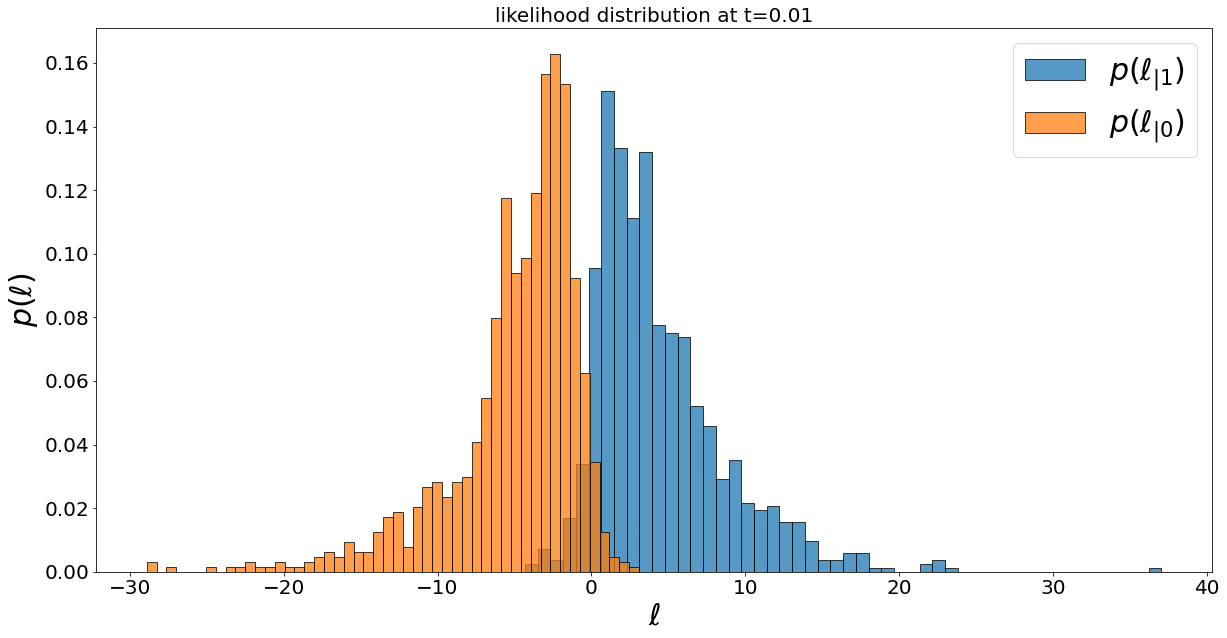

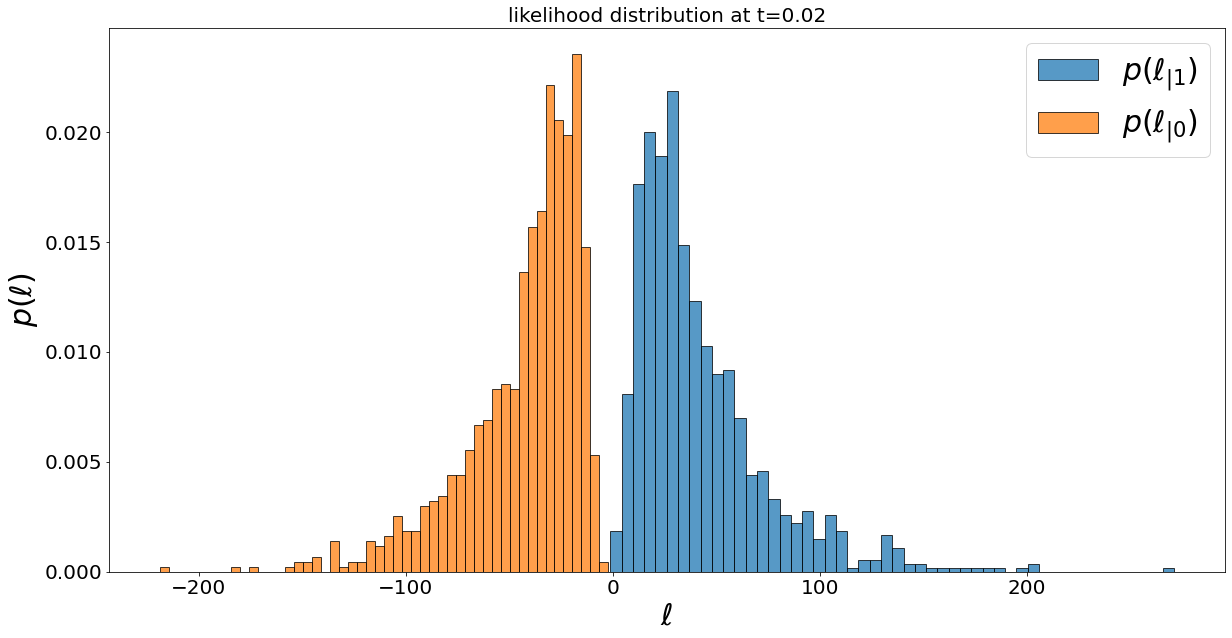

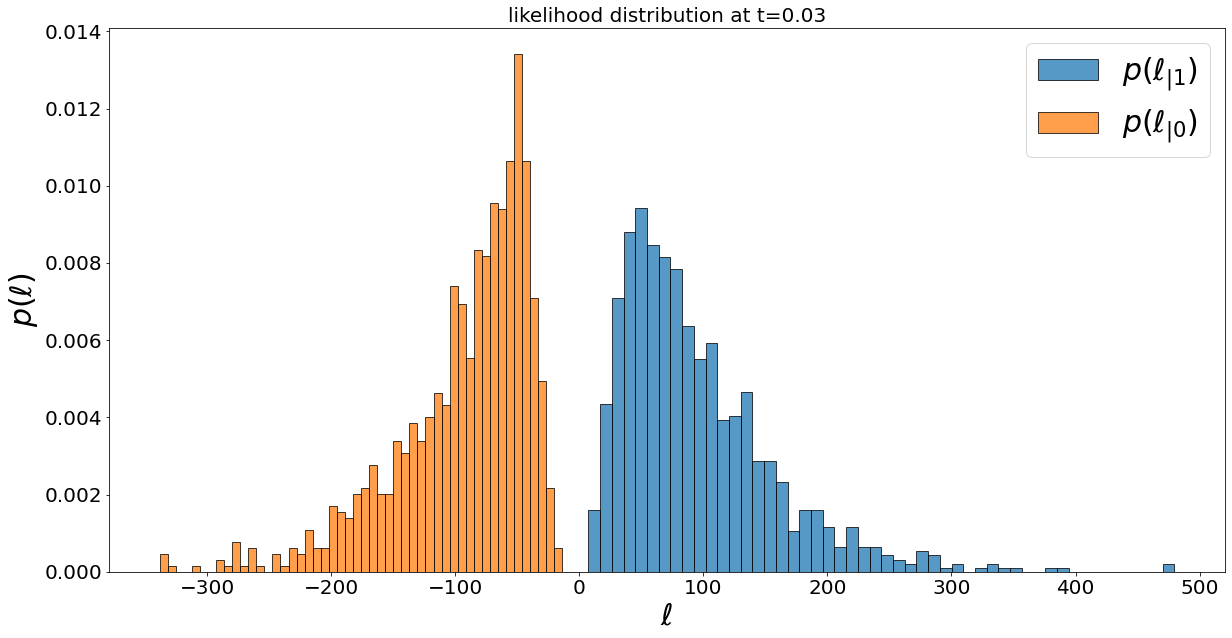

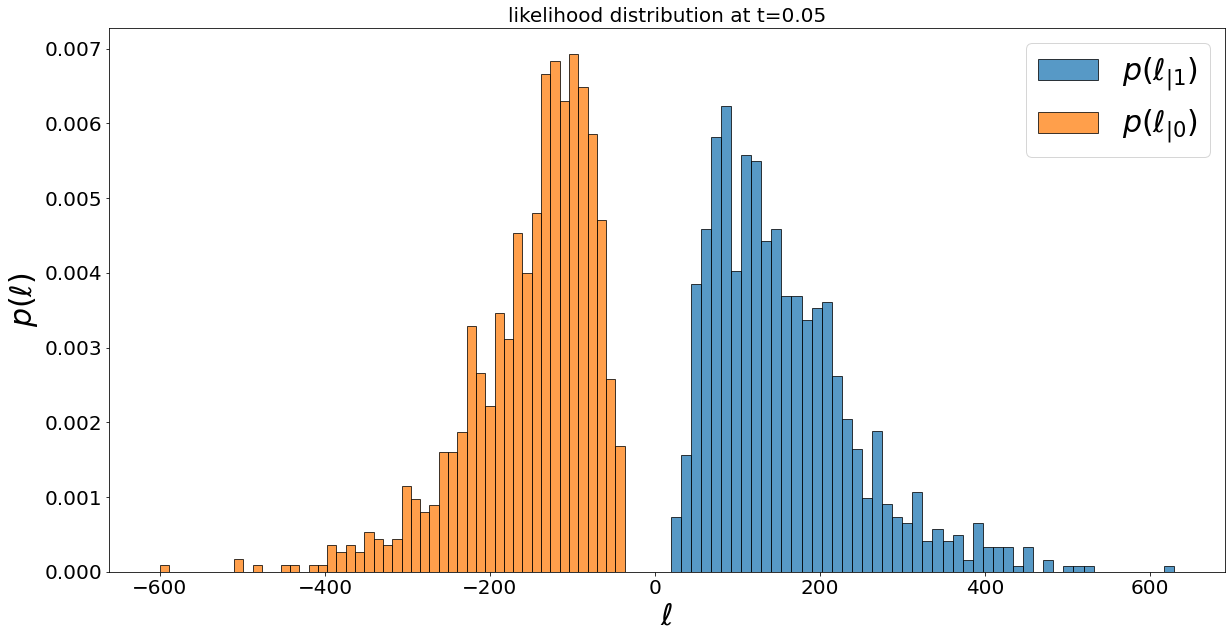

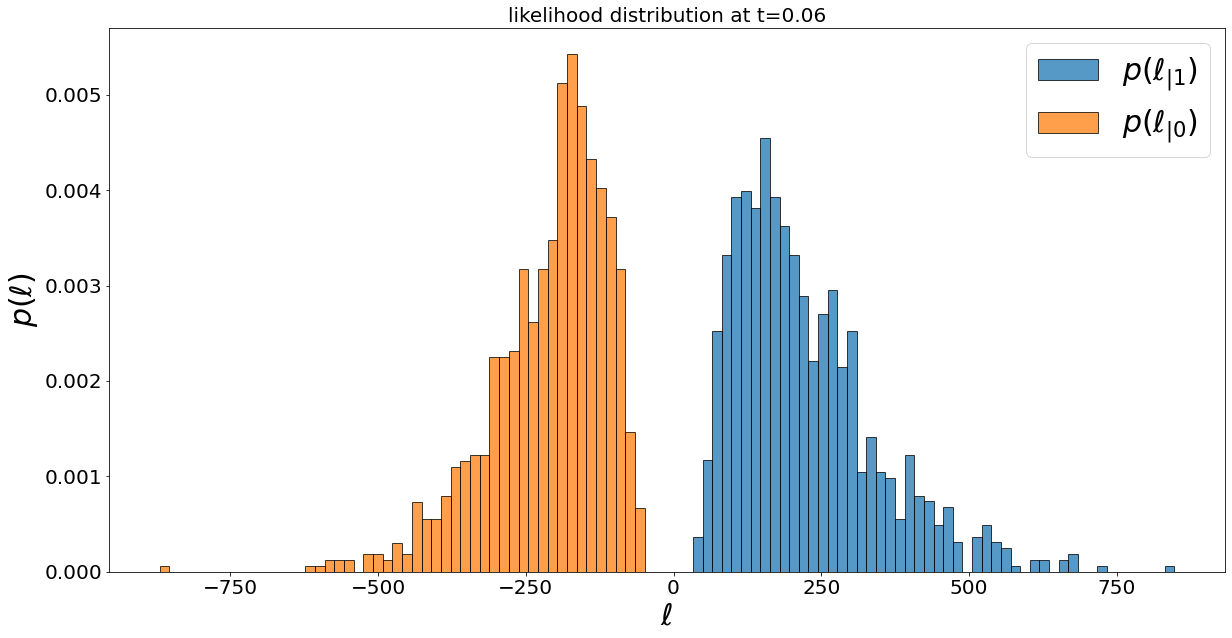

In [60]:
for indistats in np.linspace(10,len(timstats)-1,5).astype(int):
    
    plt.figure(figsize=(20,10))
    ax=plt.subplot()

    t = timstats[indistats]
    ax.set_title("likelihood distribution at t={}".format(np.round(t,2)),size=20)

    c1, b1 = np.histogram(ll1[:,indistats], bins=50, normed=True)
    c0, b0 = np.histogram(ll0[:,indistats], bins=50, normed=True)
    
    ax.bar(b1[:-1], c1, edgecolor="black", width=b1[1]-b1[0], alpha=0.75, label=r'$p(\ell_{|1})$')
    ax.bar(b0[:-1], c0, edgecolor="black",width=b0[1]-b0[0], alpha=0.75, label=r'$p(\ell_{|0})$')
    ax.set_xlabel(r'$\ell$',size=30)
    ax.set_ylabel(r'$p(\ell)$',size=30)
    ax.legend(prop={"size":30})
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    plt.savefig("figures_freq/histo_liks_{}.pdf".format(indistats))

In [61]:
import pickle as pkl

In [62]:
with open(path_data+"stop.pickle","rb") as g:
    stop = pickle.load( g)#, protocol=pickle.HIGHEST_PROTOCOL)

In [63]:
stops0 = [[] for k in range(len(bpos))]
stops1 = [[] for k in range(len(bpos))]

values1 = list(stop["_1"].values())
values0 = list(stop["_0"].values())
for k,val in enumerate(values1):
    if len(val)!=0:
        for indb in range(len(val)):
            if ~np.isnan([values1[k][indb]])[0] == True:
                stops1[indb].append(np.squeeze(values1[k][indb]))

for k,val in enumerate(values0):
    if len(val)!=0:
        for indb in range(len(val)):
            if ~np.isnan([values0[k][indb]])[0] == True:
                stops0[indb].append(np.squeeze(values0[k][indb]))


cons1, cons0 = [], []
anals1, anals0 = [], []
timbin0, timbin1 = [], []
for indb, b in enumerate(tqdm(bpos)):
    counts1, bins1 = np.histogram(stops1[indb], 50, density=True)
    counts0, bins0 = np.histogram(stops0[indb], 50, density=True)

    timms1 = np.linspace(0,np.max(bins1), 100)
    timms0 = np.linspace(0,np.max(bins0), 100)

    timbins1 = .5*(bins1[1:] + bins1[:-1])
    timbins0 = .5*(bins0[1:] + bins0[:-1])

    cons1.append(counts1)
    cons0.append(counts0)

    timbin1.append(timbins1)
    timbin0.append(timbins0)

  0%|          | 0/5 [00:00<?, ?it/s]/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
100%|██████████| 5/5 [00:00<00:00, 322.86it/s]


In [64]:
def prob_craft(t, b, mu, S):
    div = (np.sqrt(2*np.pi)*S*(t**(3/2)))
    return  abs(b)*np.exp(-((abs(b)-mu*t)**2)/(2*t*(S**2)))/div

In [68]:
bpos

array([  0,  25,  50,  75, 100])

No handles with labels found to put in legend.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


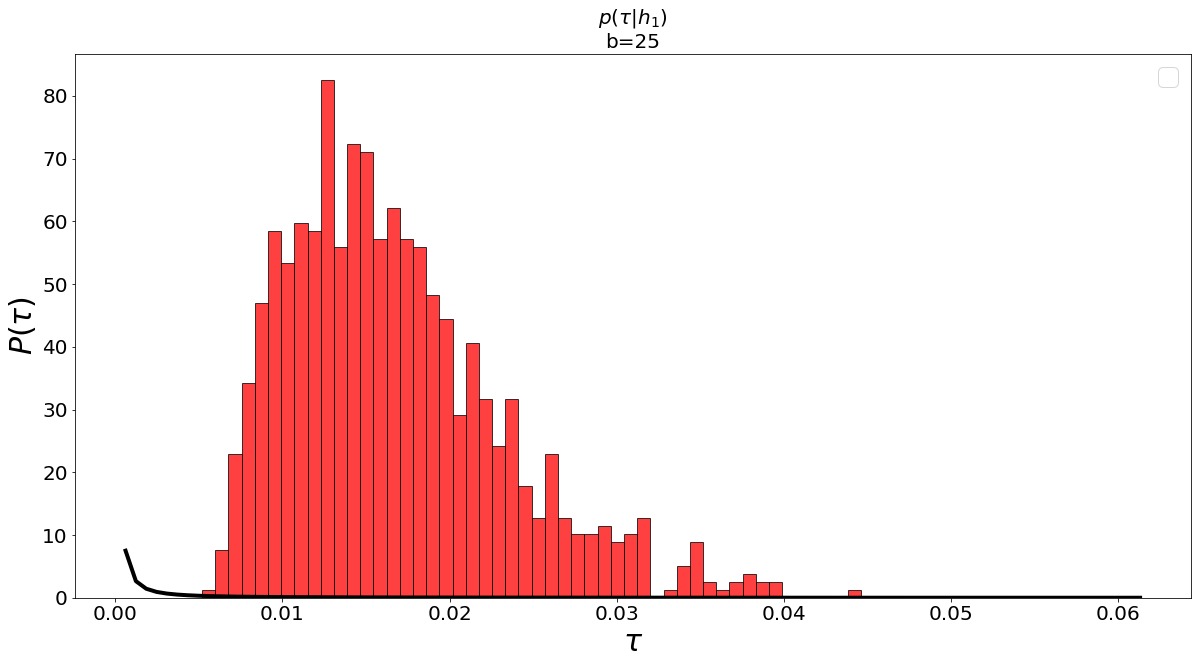

In [71]:
LS, TS = 30, 20
plt.figure(figsize=(20,10))
ax = plt.subplot(111)
indb =1
ax.bar(timbin1[indb], cons1[indb], width=timbin1[indb][1]-timbin1[indb][0], color="red", alpha=0.75, edgecolor="black")
ax.set_xlabel(r'$\tau$',size=LS)
ax.set_ylabel(r'$P(\tau)$', size=LS)
ax.tick_params(axis='both', which='major', labelsize=TS)
ax.legend(prop={"size":25})

[mu1, oomu1], [sigma1, oosig1] = fit_2moments(timind[::100],np.mean(ll1, axis=0),np.std(ll1, axis=0)**2)
[mu0, oomu0], [sigma0, oosig0] = fit_2moments(timind[::100],np.mean(ll0, axis=0),np.std(ll0, axis=0))

good = [prob_craft(tt, bpos[indb] , mu1, sigma1) for tt in timstats]

ax.set_title(r'$p(\tau|h_1)$' + "\nb={}".format(np.round(bpos[indb],3)), size=20)
ax.plot(timstats,good, linewidth=4,color="black", label="mu & sigma")

In [17]:
mu1, sigma1

(4222.492202907205, 95279.40907814204)

/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


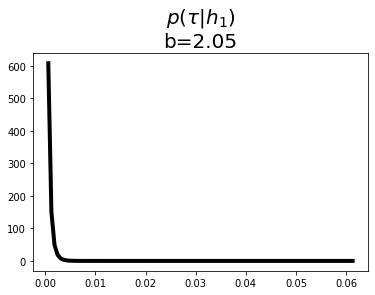

In [21]:
ax=plt.subplot()
good = [prob_craft(tt, bpos[indb] , mu1, np.sqrt(2*mu1)) for tt in timstats]

ax.set_title(r'$p(\tau|h_1)$' + "\nb={}".format(np.round(bpos[indb],3)), size=20)
ax.plot(timstats,good, linewidth=4,color="black", label="mu & sigma")

No handles with labels found to put in legend.


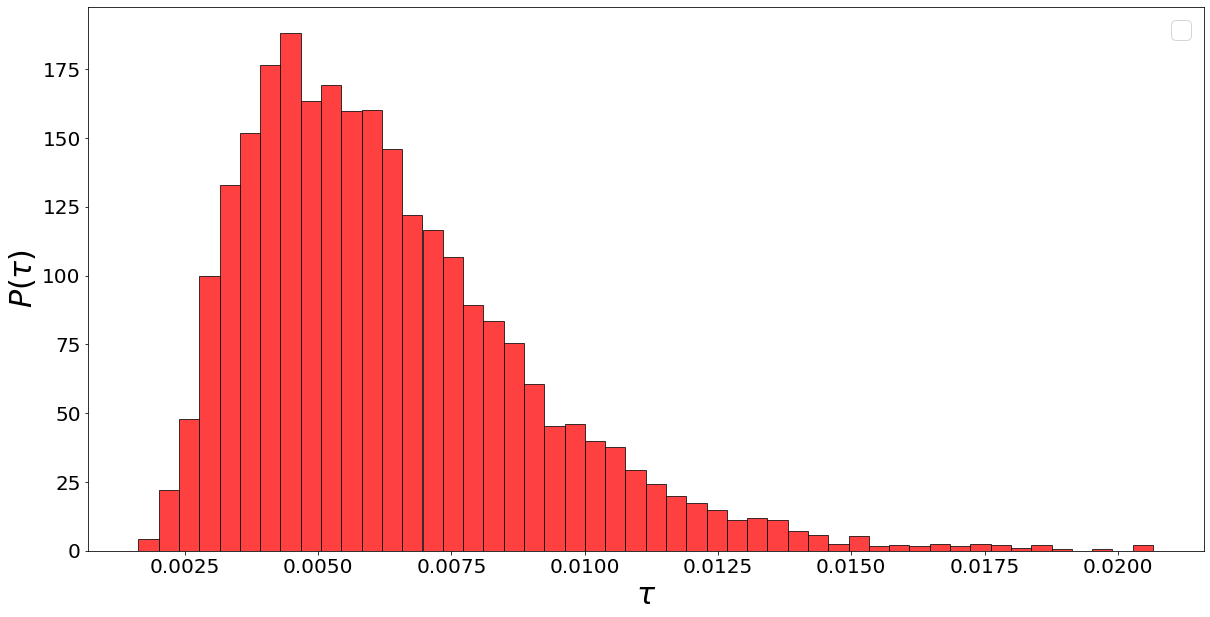

In [27]:
LS, TS = 30, 20
plt.figure(figsize=(20,10))
ax = plt.subplot(111)
indb = 80
ax.bar(timbin1[indb], cons1[indb], width=timbin1[indb][1]-timbin1[indb][0], color="red", alpha=0.75, edgecolor="black")
ax.set_xlabel(r'$\tau$',size=LS)
ax.set_ylabel(r'$P(\tau)$', size=LS)
ax.tick_params(axis='both', which='major', labelsize=TS)
ax.legend(prop={"size":25})


In [18]:
from scipy.optimize import curve_fit

In [112]:
def stop_time(t, mu, S):
    b = bpos[3]
    div = (np.sqrt(2*np.pi)*S*(t**(3/2)))
    return  abs(b)*np.exp(-((abs(b)-mu*t)**2)/(2*t*(S**2)))/div

In [113]:
indb=3
fitt = curve_fit(stop_time, timbin1[indb], cons1[indb] ,p0=np.array([mu1, np.sqrt(2*mu1)]))#, args=(bpos[indb]))#x0=np.array([mu1, sigma1]), 

In [94]:
m1, s1 = fitt[0]

In [95]:
m1, s1

(1924.7926689517892, 133.3989595340805)

In [106]:
def stop_time_only_sigma(t, S):
    b = bpos[2]
    mu = np.mean(ll1[:,-1])/timstats[-1]
    div = (np.sqrt(2*np.pi)*S*(t**(3/2)))
    return  abs(b)*np.exp(-((abs(b)-mu*t)**2)/(2*t*(S**2)))/div

In [107]:
fitt_s = curve_fit(stop_time_only_sigma, timbin1[indb], cons1[indb] ,p0=np.array([np.sqrt(2*mu1)]))#, args=(bpos[indb]))#x0=np.array([mu1, sigma1]), 

In [108]:
mu1

4242.055640726768

In [109]:
ss = fitt_s[0]
ss

array([575.81972109])

In [116]:
bpos[indb]

75

In [119]:
omega0

10000.0

In [120]:
omega1

10500.0

No handles with labels found to put in legend.
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


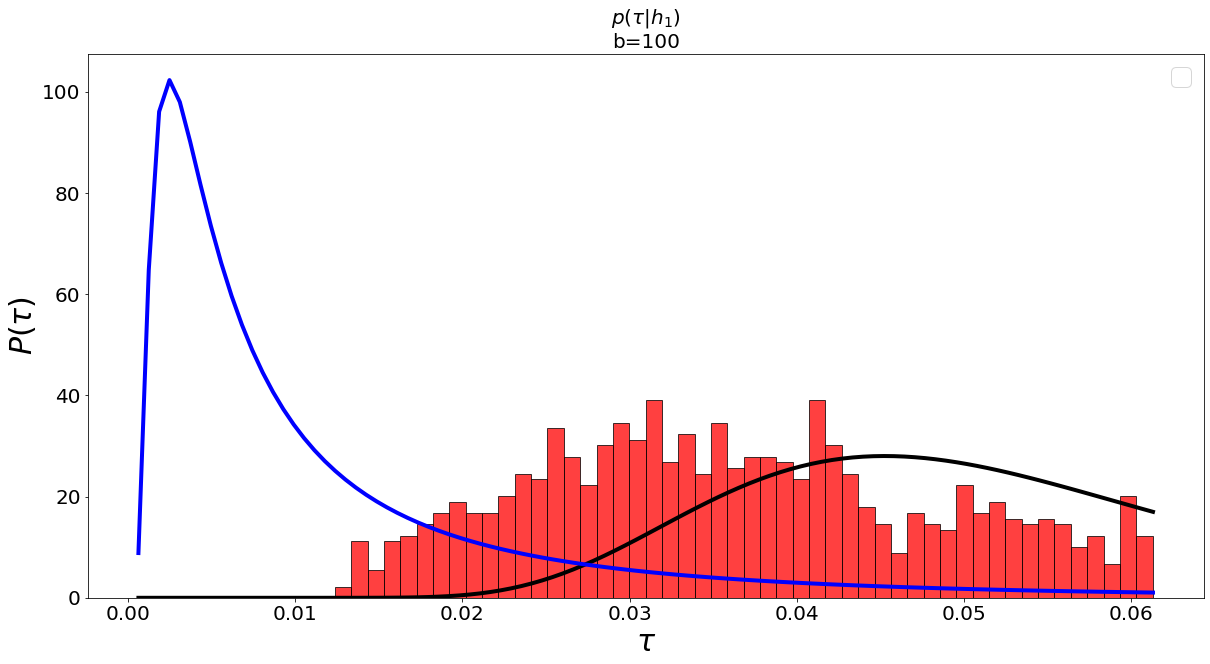

In [118]:
LS, TS = 30, 20
plt.figure(figsize=(20,10))
ax = plt.subplot(111)
indb = 4
ax.bar(timbin1[indb], cons1[indb], width=timbin1[indb][1]-timbin1[indb][0], color="red", alpha=0.75, edgecolor="black")
ax.set_xlabel(r'$\tau$',size=LS)
ax.set_ylabel(r'$P(\tau)$', size=LS)
ax.tick_params(axis='both', which='major', labelsize=TS)
ax.legend(prop={"size":25})
good = [prob_craft(tt, bpos[indb] , m1,s1) for tt in timstats]
popo = [stop_time_only_sigma(t, ss) for t in timstats]
ax.set_title(r'$p(\tau|h_1)$' + "\nb={}".format(np.round(bpos[indb],3)), size=20)
ax.plot(timstats,good, linewidth=4,color="black", label="mu & sigma")
ax.plot(timstats,popo, linewidth=4,color="blue", label="sigma")

#plt.savefig("figures_freq/histo_stop_time_{}_fitted.pdf".format(indb))

In [58]:
from scipy.special import erf

In [51]:
times_to_errs_det = np.load(path_data+"times_to_err_det.npy")
times_sequential =np.load(path_data+"times_to_err_stoch.npy")

In [ ]:
ax=plt.subplot(111)
ax.

In [47]:
s1aaa

22.26706139940238

In [48]:
sigma1

95279.40907814202

In [49]:
mu1

4222.492202907205

In [52]:
alpha_seq = lambda b: (1-np.exp(-b))/(np.exp(b) - np.exp(-b))
beta_seq = lambda b: (1-np.exp(-b))/(np.exp(b) - np.exp(-b))
epsilon = lambda b: np.exp(-abs(b))/(1 + np.exp(-abs(b)))

mu1s = [mu1]
mu0s = [mu0]
ana_wald1 = np.array([(np.array([b*(1-beta_seq(b)) -b*(alpha_seq(b)) for b in bpos])/mu1) for mu1 in mu1s])
ana_wald0 = np.array([(np.array([-b*(alpha_seq(b)) +b*(1-alpha_seq(b)) for b in bpos])/mu0) for mu0 in mu0s])


def dete_alpha(t, b, mu,sigma):
    inside = (b + mu*t)/(np.sqrt(2*t*sigma**2))
    return (1 -  erf(inside))/2

def dete_beta(t, b, mu,sigma):
    inside = (b - mu*t)/(np.sqrt(2*t*sigma**2))
    return (1 +  erf(inside))/2

In [56]:
[dete_alpha(t, 0., abs(mu0), sigma0) for t in times_sequential]

NameError: name 'erf' is not defined

In [53]:
np.array([.5*(dete_alpha(t, 0., abs(mu0s[i]), sig0s[i]) + dete_beta(t, 0., abs(mu1s[i]), sig1s[i])) for t in seq[i]])

701.4133415173291

In [ ]:
ax=plt.subplot(111)


errors_alpha = np.array([.5*(dete_alpha(t, 0., abs(mu0s[i]), sig0s[i]) + dete_beta(t, 0., abs(mu1s[i]), sig1s[i])) for t in seq[i]])
empirical_error_alpha_det = [symms[i][np.argmin(np.abs(timind-t))] for t in seq[i]]


ax.plot(-np.log(empirical_error_alpha_det), seq[i], '.', color="blue", label="deterministic - numerics")
ax.plot(-np.log(errors_alpha), seq[i], color="blue", linewidth=10, alpha=0.5, label="deterministic - analytics")

#fini = np.argmax(np.isnan(seq[i]))-1#np.argmin(np.abs(seq[i][~np.isnan(seq[i])] - timind[-1]))#np.argmin(np.abs(seq[i]-timind[-1]))    
fini = np.argmin(np.abs(np.array(det[i])[~np.isnan(np.array(det[i]))] - timind[-1]))
ax.plot(-np.log(epsilon(bpos))[ini:fini],seq[i][ini:fini],'.-',color="red",label="sequential - numerics")
ax.plot(-np.log(epsilon(bpos))[ini:fini], .5*(ana_wald1 + ana_wald0)[i][ini:fini]  ,linewidth=10, alpha=0.5,color="red", label="Sequential - analytics Wald")

ax.legend(prop={"size":30})
ax.set_ylabel(r'$time$',size=30)
ax.set_xlabel(r'$-\log P_e$',size=30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)


In [ ]:


#muu = l1[-1]/timind[-1]

timm =  np.linspace(np.min(timbin1),np.max(timbin1),100)

[mu0, oomu0], [sigma0, oosig0] = fit_2moments(momlik[0],momlik[2], momlik[4])
[mu1, oomu1], [sigma1, oosig1] = fit_2moments(momlik[0],momlik[1], momlik[3])


popo = [prob_craft(tt, bpos[indb] , mu1, np.sqrt(2*mu1)) for tt in timm]

ax.plot(timm,popo, linewidth=4, color="purple", label="mu only")


ax=plt.subplot(122)

popo = [prob_craft(tt, bpos[indb] , abs(mu0), np.sqrt(2*abs(mu0))) for tt in timm]
good = [prob_craft(tt, bpos[indb] , abs(mu0), abs(sigma0)) for tt in timm]

ax.set_title("p(\tau|\h_0) \nb={}".format(np.round(bpos[indb],3)), size=20)
ax.plot(timm,good, linewidth=4,color="black", label="mu & sigma")
ax.plot(timm,popo, linewidth=4, color="purple", label="mu only")

ax.bar(timbin0[indb], cons0[indb], width=timbin0[indb][1]-timbin0[indb][0], color="red", alpha=0.75, edgecolor="black",)#, label="simulations")
ax.set_xlabel(r'$\tau$',size=LS)
ax.set_ylabel(r'$P(\tau)$', size=LS)
ax.tick_params(axis='both', which='major', labelsize=TS)
ax.legend(prop={"size":25})

array([10, 32, 54, 76, 99])

In [ ]:
def give_me_gauss(b, mu,sigma,xrange):
    gauss = lambda x,m,g: np.exp(-((x-m)**2)/(2*g**2))/np.sqrt(2*np.pi*g**2)
    xx = np.linspace(xrange[0], xrange[1],500)
    return xx, np.array([gauss(x, mu, sigma) for x in xx])


indistats = 5
c1, b1 = np.histogram(statsL1[:,indistats], bins=50, normed=True)
c0, b0 = np.histogram(statsL0[:,indistats], bins=50, normed=True)

times = np.linspace(0,8+1e-5, int(1e4))[::100]
timstats = [times[k] for k in np.linspace(0,len(times)-1,statsL1.shape[1]).astype(int)]

[mu1, oomu1], [sigma1, oosig1] = fit_2moments(momlik[0],momlik[1], momlik[3])
[mu0, oomu0], [sigma0, oosig0] = fit_2moments(momlik[0],momlik[2], momlik[4])



plt.figure(figsize=(20,10))
ax=plt.subplot()

t = timstats[indistats]
ax.set_title("likelihood distribution at t={}".format(np.round(t,2)),size=20)


ax.bar(b1[:-1], c1, edgecolor="black", width=b1[1]-b1[0], alpha=0.75)
ax.bar(b0[:-1], c0, edgecolor="black",width=b0[1]-b0[0], alpha=0.75)

xrange = (1.2*np.min([b0,b1]), 1.2*np.max([b0,b1]))

bb,gg = give_me_gauss(b1, -mu1*t,sigma1*np.sqrt(t), xrange)

ax.plot(bb,gg, color="black", linewidth=3, label=r'$\mu, \sigma$')
bb,gg = give_me_gauss(b1, -mu1*t,np.sqrt(2*mu1)*np.sqrt(t), xrange)

bb,gg = give_me_gauss(b0, mu0*t,sigma0*np.sqrt(t), xrange)
ax.plot(bb,gg,color="blue", linewidth=3)

ax.legend(prop={"size":20})

In [8]:


alphas = list(deter["h1/h0"].values())
betas = list(deter["h0/h1"].values())

alphas = np.stack(alphas)
betas = np.stack(betas)

avg_err= lambda b: (1-np.exp(-abs(b)))/(np.exp(abs(b)) - np.exp(-abs(b)))

errs_bound = np.array([avg_err(b) for b in bpos])
tot_err = 0.5*(alphas+betas)

symmetric = tot_err[np.argmin(np.abs(boundsB)),:]
times_to_errs_det = np.array([timind[np.argmin(np.abs(symmetric - bound_err))] for bound_err in errs_bound])



stops0 = [[] for k in range(len(bpos))]
stops1 = [[] for k in range(len(bpos))]

values1 = list(stop["_1"].values())
values0 = list(stop["_0"].values())
for k,val in enumerate(values1):
    if len(val)!=0:
        for indb in range(len(val)):
            if ~np.isnan([values1[k][indb]])[0] == True:
                stops1[indb].append(np.squeeze(values1[k][indb]))#

for k,val in enumerate(values0):
    if len(val)!=0:
        for indb in range(len(val)):
            if ~np.isnan([values0[k][indb]])[0] == True:
                stops0[indb].append(np.squeeze(values0[k][indb]))


### sequential test
avg_times1 = np.array([np.mean(k) for k in stops1])
avg_times0 = np.array([np.mean(k) for k in stops0])

times_sequential = 0.5*(avg_times0 + avg_times1)


os.makedirs(path_data,exist_ok=True)

with open(path_data+"stop.pickle","wb") as g:
    pickle.dump(stop, g, protocol=pickle.HIGHEST_PROTOCOL)

with open(path_data+"deter.pickle","wb") as f:
    pickle.dump(deter, f, protocol=pickle.HIGHEST_PROTOCOL)

np.save(path_data+"times_to_err_det",times_to_errs_det)
np.save(path_data+"times_to_err_stoch",times_sequential)


np.save(path_data+"ll0",np.stack(l0t))
np.save(path_data+"ll1",np.stack(l1t))

print("data saved in {}\n".format(path_data))


100%|██████████| 4999/4999 [46:37<00:00,  1.79it/s]  


data saved in /data/uab-giq/scratch/matias/quantera/trajectories/mechanical_freq/freqs/[10000.0, 10500.0]//T_0.06129936885053255_dt_6.129936885053255e-06/B6.0_db0.05_5000/



In [10]:
import matplotlib.pyplot as plt 

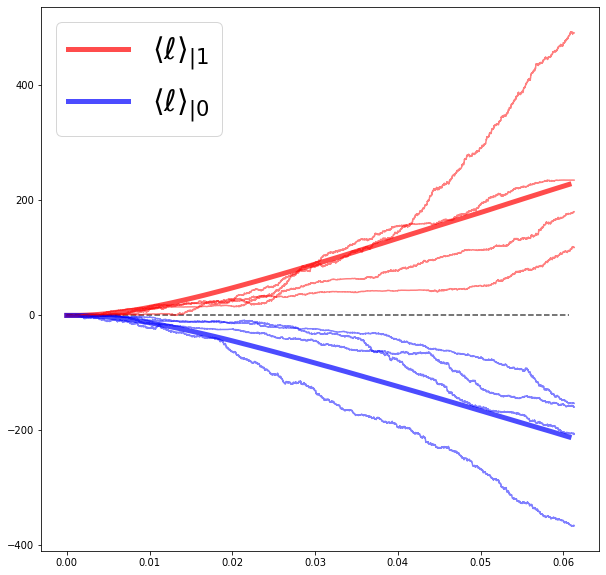

In [12]:
plt.figure(figsize=(10,10))
ax=plt.subplot()
timindt = timind[::100]
ax.plot(timindt,np.mean(l1t,axis=0),color="red", alpha=.7, linewidth=5,label=r'$\langle\ell\rangle_{|1}$')
ax.plot(timindt,np.mean(l0t,axis=0),color="blue", alpha=.7, linewidth=5,label=r'$\langle\ell\rangle_{|0}$')
ax.plot(timindt,0.*np.mean(l0t,axis=0),'--',color="black", alpha=.7)#, linewidth=2#,label="0")

for itraj in range(1,5):
    [l0_1,l1_1], [l1_0,l0_0] = load_traj(itraj=itraj,what="logliks.npy", flip_params=0).T, load_traj(itraj=itraj,what="logliks.npy", flip_params=1).T
    log_lik_ratio, log_lik_ratio_swap = l1_1-l0_1, l1_0-l0_0
    ax.plot(timind,log_lik_ratio,alpha=.5, color="red")
    ax.plot(timind,log_lik_ratio_swap, alpha=.5, color="blue")   
ax.legend(prop={"size":30})

In [ ]:
ana_wald1 = np.array([(np.array([b*(1-beta_seq(b)) -b*(alpha_seq(b)) for b in bpos])/mu1) for mu1 in mu1s])
ana_wald0 = np.array([(np.array([-b*(alpha_seq(b)) +b*(1-alpha_seq(b)) for b in bpos])/mu0) for mu0 in mu0s])


def dete_alpha(t, b, mu,sigma):
    inside = (b + mu*t)/(np.sqrt(2*t*sigma**2))
    return (1 -  erf(inside))/2

def dete_beta(t, b, mu,sigma):
    inside = (b - mu*t)/(np.sqrt(2*t*sigma**2))
    return (1 +  erf(inside))/2
